In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as sts
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [64]:
df=pd.read_csv("Index2018.csv")

In [65]:
df.head(10)

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26
5,14/01/1994,474.91,2151.05,3400.56,18973.70
6,17/01/1994,473.30,2115.56,3407.83,18725.37
7,18/01/1994,474.25,2130.35,3437.01,18514.55
8,19/01/1994,474.30,2132.52,3475.15,19039.40
9,20/01/1994,474.98,2098.36,3469.99,19183.92


In [66]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)

In [67]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [68]:
df['spx'].isnull().sum()

0

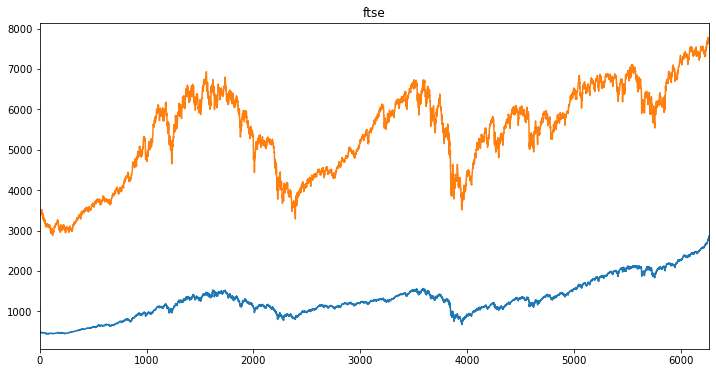

In [69]:
df['spx'].plot(figsize=(12,6),title='S&P 500')
df['ftse'].plot(figsize=(12,6),title='ftse')

In [44]:
import scipy
import pylab

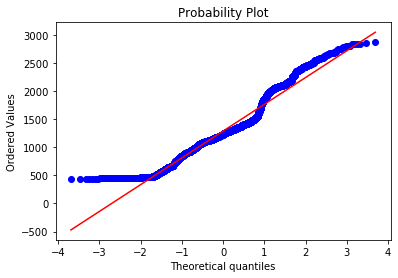

In [45]:
scipy.stats.probplot(df['spx'],plot=pylab)
pylab.show()

In [46]:
u=pd.DataFrame(np.random.randn(1000))

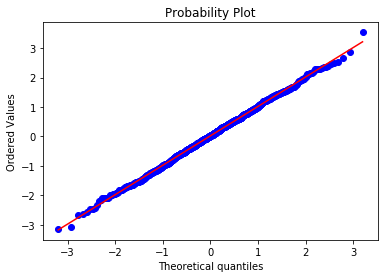

In [47]:
scipy.stats.probplot(u[0],plot=pylab);

In [73]:
df=df.set_index('date')

In [74]:
df_day=df.asfreq('b')

In [75]:
df_day

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [76]:
df_day.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [77]:
df_day[df_day['spx'].isnull()==True]

,spx,dax,ftse,nikkei
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


In [78]:
df_day=df_day.interpolate()

In [79]:
df_day.drop(['dax','ftse','nikkei'],axis=1,inplace=True)

In [80]:
df_day

,spx
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


In [81]:
size = int(len(df_day)*0.8)

In [82]:
train=df_day.iloc[:size]
test=df_day.iloc[size:]

In [83]:
train.tail()

,spx
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [84]:
test.head()

,spx
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [85]:
wn = np.random.normal(loc=train['spx'].mean(),scale=train['spx'].std(),size=len(train))

In [86]:
train['wn']=wn

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'White Noise TS')

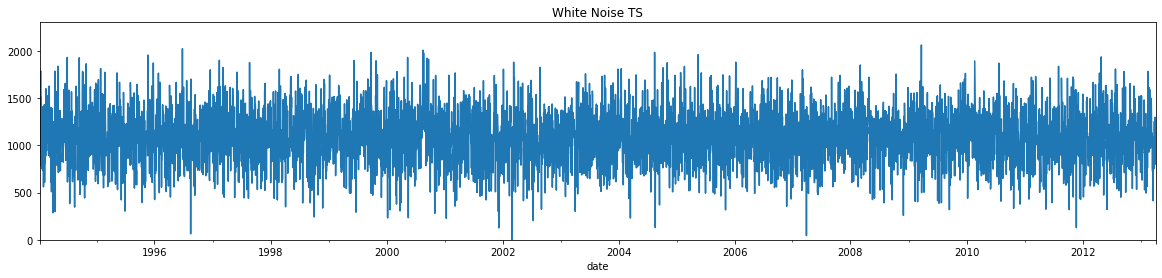

In [87]:
train['wn'].plot(figsize=(20,4))
plt.ylim(0,2300)
plt.title("White Noise TS")

(0, 2300)

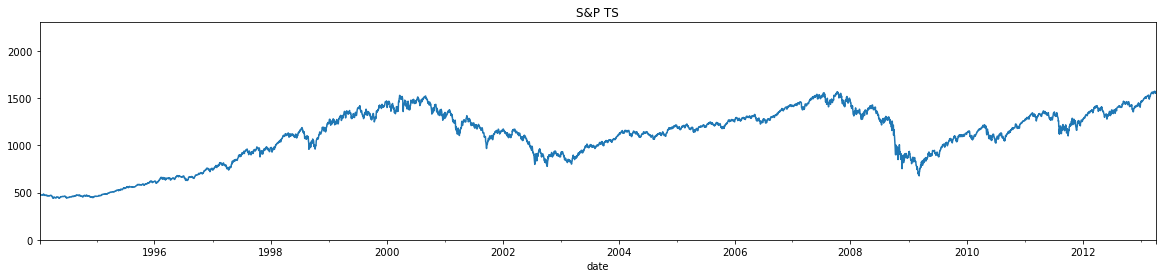

In [88]:
train['spx'].plot(figsize=(20,4))
plt.title("S&P TS")
plt.ylim(0,2300)

## Random Walk

In [89]:
rw = pd.read_csv('RandWalk.csv')
rw.date=pd.to_datetime(rw.date,dayfirst=True)

In [90]:
rw.set_index('date',inplace=True)

In [91]:
rw.describe()

,price
count,7029.000000
mean,1269.648367
std,443.999180
min,574.382397
25%,931.488599
50%,1155.773451
75%,1488.957260
max,2715.508720


In [92]:
rw=rw.asfreq('b')
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [93]:
train['rw']=rw

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


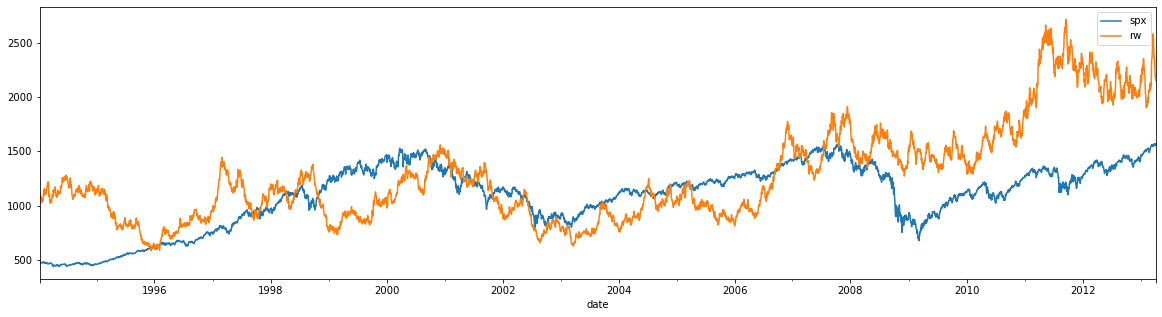

In [94]:
train[['spx','rw']].plot(figsize=(20,5),legend=True)

In [95]:
sts.adfuller(train['spx'])

(-1.7371432251219479,
 0.4120838713552569,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39897.92531326632)

In [96]:
sts.adfuller(train['wn'])

(-49.85233773447847,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70677.00767875767)

In [97]:
sts.adfuller(train['rw'])

(-1.3286073927689712,
 0.6159849181617387,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Season

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [99]:
s_desc_additive = seasonal_decompose(train['spx'],model='additive')

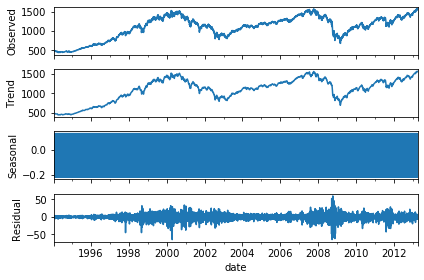

In [100]:
s_desc_additive.plot();

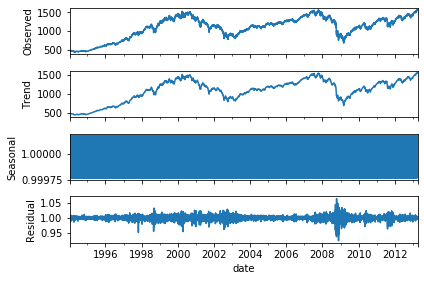

In [101]:
s_desc_multi= seasonal_decompose(train['spx'],model='multplicative')
s_desc_multi.plot();

In [102]:
import statsmodels.graphics.tsaplots as sgt

Text(0.5, 1.0, 'ACF S&P')

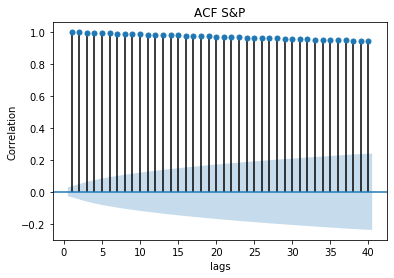

In [103]:
sgt.plot_acf(train['spx'],lags=40,zero=False)
plt.ylabel("Correlation")
plt.xlabel("lags")
plt.title('ACF S&P')

Text(0.5, 1.0, 'ACF WN')

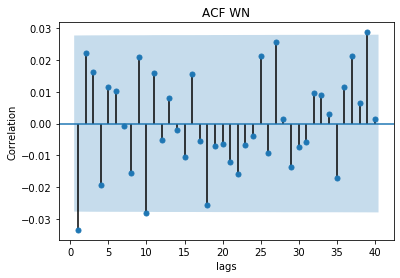

In [104]:
sgt.plot_acf(train['wn'],lags=40,zero=False)
plt.ylabel("Correlation")
plt.xlabel("lags")
plt.title('ACF WN')
#No correlation

Text(0.5, 1.0, 'ACF RW')

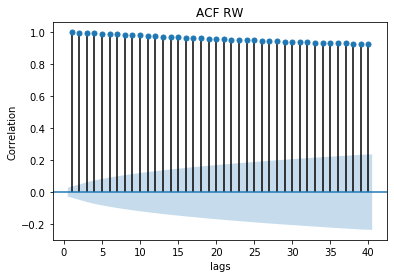

In [105]:
sgt.plot_acf(train['rw'],lags=40,zero=False)
plt.ylabel("Correlation")
plt.xlabel("lags")
plt.title('ACF RW')

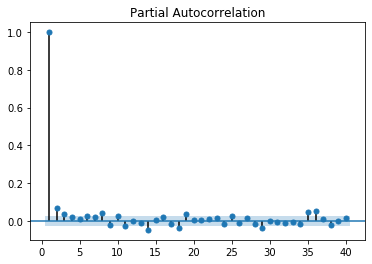

In [106]:
#Partial Auto correlation Function
sgt.plot_pacf(train['spx'],lags=40,zero=False,method ='ols');
#PACF Only show relation yesterday
#ACF Show relation from all time

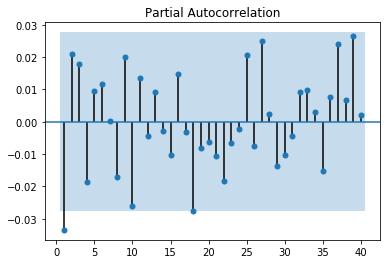

In [107]:
sgt.plot_pacf(train['wn'],lags=40,zero=False,method ='ols');
#No auto corr

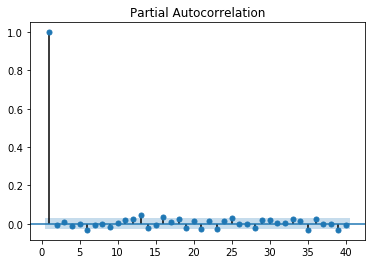

In [108]:
sgt.plot_pacf(train['rw'],lags=40,zero=False,method ='ols');

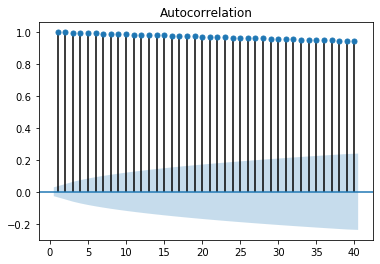

In [109]:
 #Autoregressive Model
sgt.plot_acf(train['spx'],zero=False,lags=40);

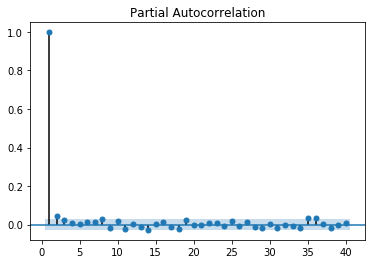

In [110]:
sgt.plot_pacf(train['spx'],lags=40,zero=False);

In [111]:
from statsmodels.tsa.arima_model import ARMA

In [112]:
arma=ARMA(train['spx'],order=(1,0))
results_ar=arma.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20093.256
Method:                       css-mle   S.D. of innovations             13.227
Date:                Mon, 30 Mar 2020   AIC                          40192.511
Time:                        07:12:30   BIC                          40212.075
Sample:                    01-07-1994   HQIC                         40199.367
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1071.6280    227.738      4.706      0.000     625.269    1517.987
ar.L1.spx      0.9994      0.001   1913.872      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

In [113]:
arma2=ARMA(train['spx'],order=(2,0))
results2_ar=arma2.fit()
results2_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20081.669
Method:                       css-mle   S.D. of innovations             13.196
Date:                Mon, 30 Mar 2020   AIC                          40171.338
Time:                        07:12:31   BIC                          40197.423
Sample:                    01-07-1994   HQIC                         40180.478
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1064.0831    247.872      4.293      0.000     578.263    1549.904
ar.L1.spx      0.9316      0.014     68.111      0.000       0.905       0.958
ar.L2.spx      0.0679      0.014      4.961      0.000       0.041       0.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.7243           +0.0000j           14.7243            0.5000
-----------------------------------------------------------------------------
"""

In [114]:
arma3=ARMA(train['spx'],order=(3,0))
results3_ar=arma3.fit()
results3_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20078.501
Method:                       css-mle   S.D. of innovations             13.188
Date:                Mon, 30 Mar 2020   AIC                          40167.003
Time:                        07:12:31   BIC                          40199.609
Sample:                    01-07-1994   HQIC                         40178.428
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1057.2425    259.236      4.078      0.000     549.149    1565.336
ar.L1.spx      0.9291      0.014     68.394      0.000       0.903       0.956
ar.L2.spx      0.0348      0.019      1.839      0.066      -0.002       0.072
ar.L3.spx      0.0355      0.014      2.518      0.012       0.008       0.063
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -0.9903           -5.2117j            5.3050           -0.2799
AR.3           -0.9903           +5.2117j            5.3050            0.2799
-----------------------------------------------------------------------------
"""

In [115]:
train['returns']=train['spx'].pct_change(1).mul(100)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
train

,spx,wn,rw,returns
date,,,,
1994-01-07,469.900000,1100.453032,1122.139662,NaN
1994-01-10,475.270000,1438.973796,1080.347860,1.142796
1994-01-11,474.130000,963.713007,1082.095245,-0.239864
1994-01-12,474.170000,927.266638,1083.639265,0.008437
1994-01-13,472.470000,1786.325480,1067.146255,-0.358521
...,...,...,...,...
2013-04-01,1562.173837,941.468280,2263.675474,-0.446858
2013-04-02,1570.252238,1295.725447,2225.000870,0.517126
2013-04-03,1553.686978,1272.071434,2190.787688,-1.054943


In [117]:
train=train.iloc[1:]

In [118]:
train

,spx,wn,rw,returns
date,,,,
1994-01-10,475.270000,1438.973796,1080.347860,1.142796
1994-01-11,474.130000,963.713007,1082.095245,-0.239864
1994-01-12,474.170000,927.266638,1083.639265,0.008437
1994-01-13,472.470000,1786.325480,1067.146255,-0.358521
1994-01-14,474.910000,1204.573018,1080.129720,0.516435
...,...,...,...,...
2013-04-01,1562.173837,941.468280,2263.675474,-0.446858
2013-04-02,1570.252238,1295.725447,2225.000870,0.517126
2013-04-03,1553.686978,1272.071434,2190.787688,-1.054943


In [119]:
df['returns']=df['ftse'].pct_change(1)

In [120]:
df=df.iloc[1:]

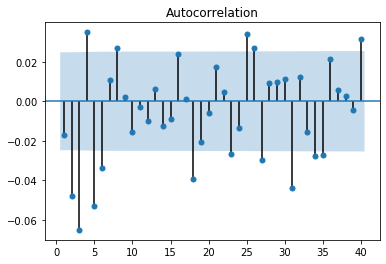

In [121]:
#FTSE
sgt.plot_acf(df['returns'],lags=40,zero=False);

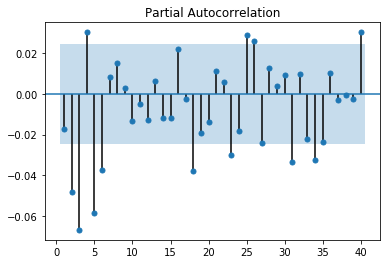

In [122]:
sgt.plot_pacf(df['returns'],lags=40,zero=False);

In [123]:
model_ret_ar1=ARMA(df.returns,order=(1,0))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [124]:
results_ret_ar1=model_ret_ar1.fit()

In [125]:
results_ret_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6268
Model:                     ARMA(1, 0)   Log Likelihood               19275.699
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 30 Mar 2020   AIC                         -38545.399
Time:                        07:12:34   BIC                         -38525.169
Sample:                             0   HQIC                        -38538.389
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.371      0.171   -8.18e-05       0.000
ar.L1.returns    -0.0172      0.013     -1.364      0.173      -0.042       0.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -58.0479           +0.0000j           58.0479            0.5000
-----------------------------------------------------------------------------
"""

In [126]:
model_ret_ar2=ARMA(df.returns,order=(2,0))
results_ret_ar2=model_ret_ar2.fit()
results_ret_ar2.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6268
Model:                     ARMA(2, 0)   Log Likelihood               19283.030
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 30 Mar 2020   AIC                         -38558.059
Time:                        07:12:35   BIC                         -38531.087
Sample:                             0   HQIC                        -38548.713
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.439      0.150   -6.89e-05       0.000
ar.L1.returns    -0.0181      0.013     -1.432      0.152      -0.043       0.007
ar.L2.returns    -0.0484      0.013     -3.833      0.000      -0.073      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1868           -4.5438j            4.5476           -0.2565
AR.2           -0.1868           +4.5438j            4.5476            0.2565
-----------------------------------------------------------------------------
"""

## MA

In [128]:
df.drop(['dax','ftse','nikkei'],inplace=True,axis=1)

In [130]:
df['returns']=df['spx'].pct_change(1)*100

In [131]:
df

,spx,returns
date,,
1994-01-10,475.270000,NaN
1994-01-11,474.130000,-0.239864
1994-01-12,474.170000,0.008437
1994-01-13,472.470000,-0.358521
1994-01-14,474.910000,0.516435
...,...,...
2018-01-23,2839.130362,0.217307
2018-01-24,2837.544008,-0.055875
2018-01-25,2839.253031,0.060229


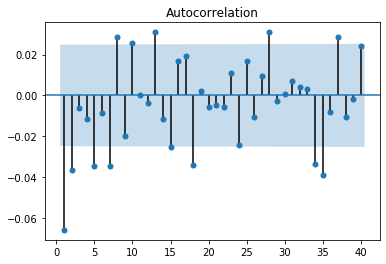

In [136]:
plot_acf(df['returns'][1:],zero=False,lags=40);